# DT2470 Lab 02: Teh Machine Learnings

Simon Falk
simonfal@kth.se


# Part 1: Basics

In this part, you will explore some basic principles of machine learning. First we are going to synthesize a "toy" dataset, where we know everything about the data. This is the "best case scenario", and can help us understand ML methods and their parameters, as well as debug implementations.



In [4]:
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

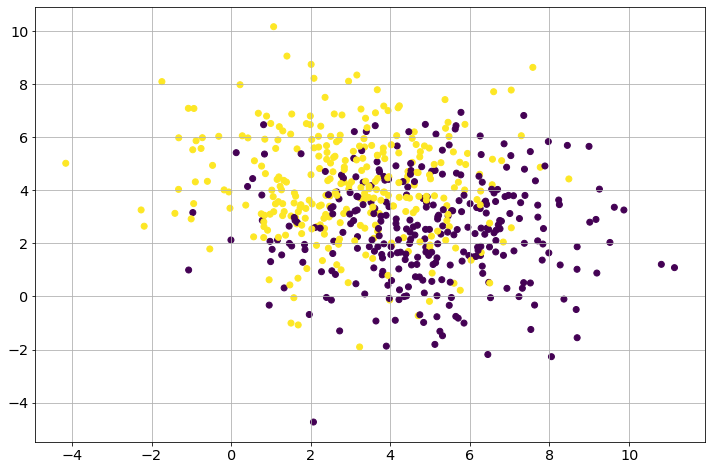

In [5]:
numClasses = 2 # number of separate classes
numObservations = numClasses*300 # number of total observations
cluster_std = 2 # spread of the classes, larger leads to more confusion

# create a labeled dataset and make a pandas dataframe
X,y = datasets.make_blobs(numObservations,centers=numClasses,cluster_std=cluster_std,random_state=190)

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 8),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# make a scatter plot of the dataset
fig, ax = plt.subplots()
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(); plt.show()

# 1.1
Create a 80/20 train/test split of your data. See [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) for the function *train_test_split*.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)


# 1.2

Create an instance of a nearest neighbor classifier and train it with your *training* data. See [sklearn.neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) for the appropriate function.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)


KNeighborsClassifier()

# 1.3 

Plot the decision boundary of your trained classifier. Use the *plot_decision_regions* function in [mlxtend.plotting](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions).

<AxesSubplot:>

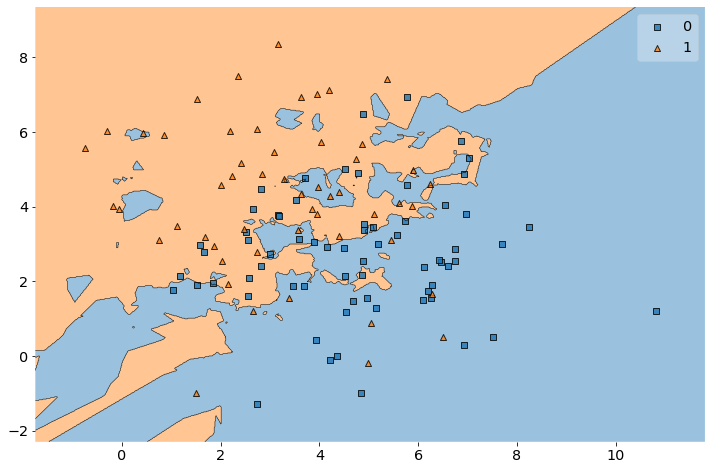

In [8]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test,y_test,classifier)

# 1.4

Use your classifier to label the hold out set, and print out the predicted labels and true labels. 

In [9]:
predicted_y = classifier.predict(X_test)
true_y = y_test

print("(Predicted label, True label)")
print([(p,t) for (p,t) in zip(predicted_y,true_y)])

(Predicted label, True label)
[(0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (1, 0), (1, 1), (1, 1), (1, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 1), (0, 1), (0, 1), (1, 1), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 0), (1, 1), (0, 1), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0), (0, 0), (1, 0), (1, 1), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0), (0, 0), (1, 0), (0, 1), (0, 1), (1, 1), (0, 0), (0, 0)]


# 1.5 

Print the confusion matrix of the results. See [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for a relevant function.

In [11]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(true_y, predicted_y))


[[43 24]
 [16 37]]


# 1.6

Use the *classification_report* function of [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to print out more metrics for your classifier.

In [12]:
from sklearn.metrics import classification_report
print(classification_report(true_y, predicted_y))


              precision    recall  f1-score   support

           0       0.73      0.64      0.68        67
           1       0.61      0.70      0.65        53

    accuracy                           0.67       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.67      0.67      0.67       120



# 1.7 

Now you will explore k nearest neighbor classification with the toy dataset.
Create a 50/30/20 train/validation/test split of your data.

In [13]:
# add your code below

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                        y_train,
                                                        test_size=3/8,
                                                        random_state=19
                                                
)


# 1.8

For k in 1 to 51 by odd integers, train a kNN classifier and compute its accuracy on the training dataset and the validation dataset. Plot these accuracies as a function of k.

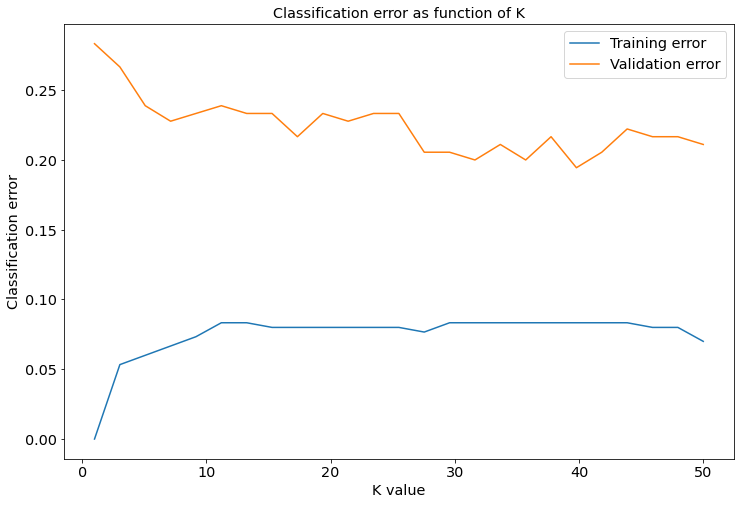

In [14]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

scores_train = []
scores_val = []

min_err = 100000

for k in range(1,50,2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)

    y_pred_train = classifier.predict(X_train)
    y_pred_val = classifier.predict(X_val)
    err_train = 0
    err_val = 0
    for i in range(len(true_y)):
        if y_train[i] != y_pred_train[i]:
            err_train += 1
        if y_val[i] != y_pred_val[i]:
            err_val += 1
    if err_val < min_err:
        min_err = err_val
        min_err_k = k
    scores_train.append(err_train/len(y_pred_train))
    scores_val.append(err_val/len(y_pred_val))

plt.title("Classification error as function of K")
plt.xlabel("K value")
plt.ylabel("Classification error")
plt.plot(np.linspace(1,50,len(scores_train)), scores_train)
plt.plot(np.linspace(1,50,len(scores_val)), scores_val)
plt.legend(["Training error","Validation error"])
plt.show()

## Generalization, Overfitting, and Underfitting

* If a model is able to make accurate predictions on unseen data: 
    * it is able to **generalize** from the training set to the test set.
* Building a model that is too complex for the amount of information in the data is called overfitting.
* This refers to the complexity of the decision boundary, **NOT** computational complexity.



# 1.9

The complexity of KNN models decreases with K. Find the K with the highest validation accuracy, and train a kNN classifier with that K on the training data. Test it on the testing data and print its classification_report. If there are several possible K, choose one by some strategy.

> For this exercise I will choose the K that has the lowest validation error. Given one particular division of validation/training sets, it was equal to K=39.

> The precision scores got higher (0.79, 0.64 compared to 0.73, 0.61) with K=39 compared to K=5 since it was able to classify more points correctly.

In [15]:
print("Optimal K: " + str(min_err_k))

classifier = KNeighborsClassifier(n_neighbors=min_err_k)
classifier.fit(X_train, y_train)

predicted_y = classifier.predict(X_test)

print(classification_report(y_test, predicted_y))



Optimal K: 39
              precision    recall  f1-score   support

           0       0.79      0.66      0.72        67
           1       0.64      0.77      0.70        53

    accuracy                           0.71       120
   macro avg       0.71      0.72      0.71       120
weighted avg       0.72      0.71      0.71       120



# 1.10
For this classifier, plot its decision boundary, and compare with the boundary you see in #1.3.

> For a more complex model, the decision boundary is straighter, more robust and doesn't reflect the individual points' properties.

KeyboardInterrupt: 

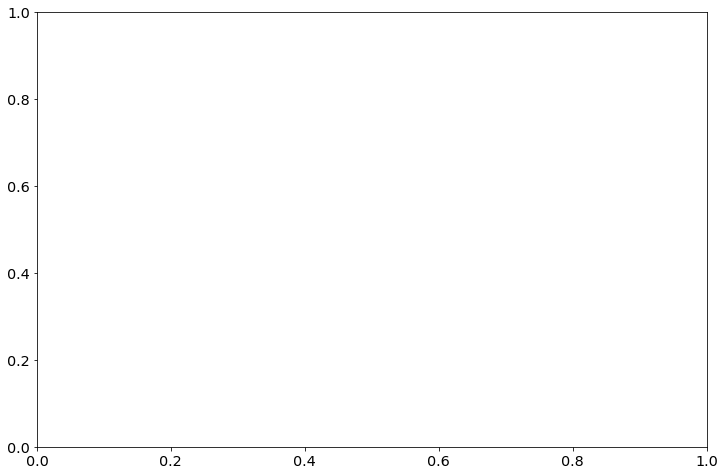

In [16]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test,y_test,classifier)

# 1.11

Change the toy dataset (number of classes, number of observations, cluster spread) and repeat the above. What happens as the cluster spread increase? What happens if there are more classes?

> I use K=39 since it had the best variance/bias trade-off for the model that we saw. I will stick to 600 observations and go into what happens when we change spread and number of classes.

> First I investigate changing class spread and keeping two classes. Let $\sigma$ be the standard deviation of cluster distributions. There is a large increase in error when $\sigma$ is larger than 3.5. Probably the clusters are fairly separated before that. This is confirmed by the plot of optimal K values, that takes on the value K=1 for small $\sigma$. The model can't be improved with larger K because the error is already zero there.

> Then I investigate changing number of classes and using $\sigma=3$ since we don't want the clusters to be too separated. We see that the error generally increases with number of classes, which is logically since there are more classes to mistakenly label an observation as. But the optimal k-value can't really be determined from number of clusters.

In [121]:
N = 600
optimal_ks = []
errors = []
for sigma in np.arange(0,5,0.5):
      
    # Create datasets
    X,y = datasets.make_blobs(N, centers=2, cluster_std=sigma)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                        y_train,
                                                        test_size=3/8,
                                                          random_state=19
                                                
    )
    
    # Train classifier for many K:s, Find optimal K
    
    min_err = 100000

    for k in range(1,50,2):
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)

        y_pred_train = classifier.predict(X_train)
        y_pred_val = classifier.predict(X_val)
        err_val = 0
        for i in range(len(true_y)):
            if y_val[i] != y_pred_val[i]:
                err_val += 1
        if err_val < min_err:
            min_err = err_val
            min_err_k = k
            
    optimal_ks.append(min_err_k)
    errors.append(min_err/N)
    print(sigma)


0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5


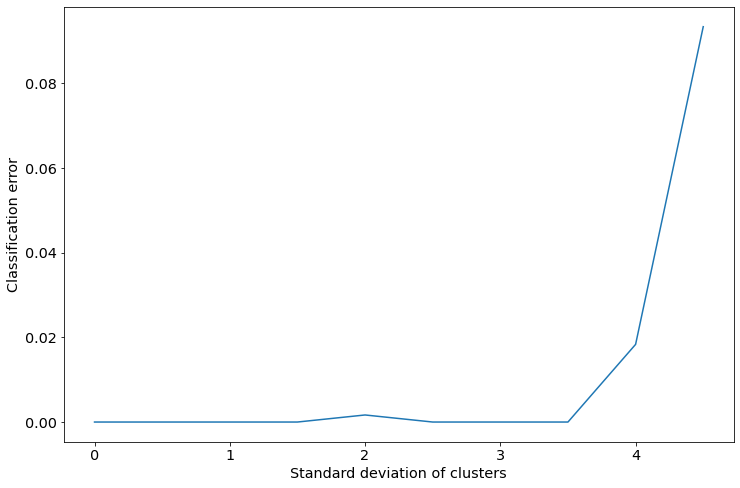

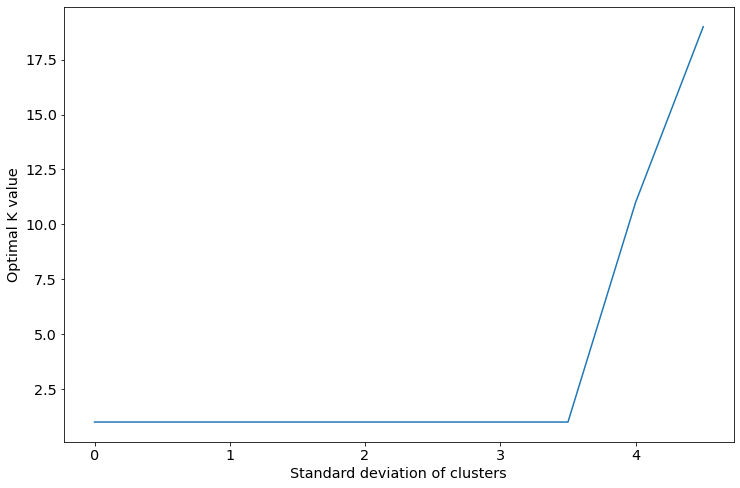

In [122]:
plt.xlabel("Standard deviation of clusters")
plt.ylabel("Classification error")
plt.plot(np.arange(0,5,0.5),errors)
plt.show()

plt.xlabel("Standard deviation of clusters")
plt.ylabel("Optimal K value")
plt.plot(np.arange(0,5,0.5),optimal_ks)
plt.show()

In [123]:
N = 600
optimal_ks = []
errors = []
for n_classes in range(2,12):
      
    # Create datasets
    X,y = datasets.make_blobs(N, centers=n_classes, cluster_std=3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                        y_train,
                                                        test_size=3/8,
                                                      random_state=14
                                                
    )
    
    # Train classifier for many K:s, Find optimal K
    
    min_err = 100000

    for k in range(1,50,2):
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)

        y_pred_train = classifier.predict(X_train)
        y_pred_val = classifier.predict(X_val)
        err_val = 0
        for i in range(len(true_y)):
            if y_val[i] != y_pred_val[i]:
                err_val += 1
        if err_val < min_err:
            min_err = err_val
            min_err_k = k
            
    optimal_ks.append(min_err_k)
    errors.append(min_err/N)
    print(n_classes)

2
3
4
5
6
7
8
9
10
11


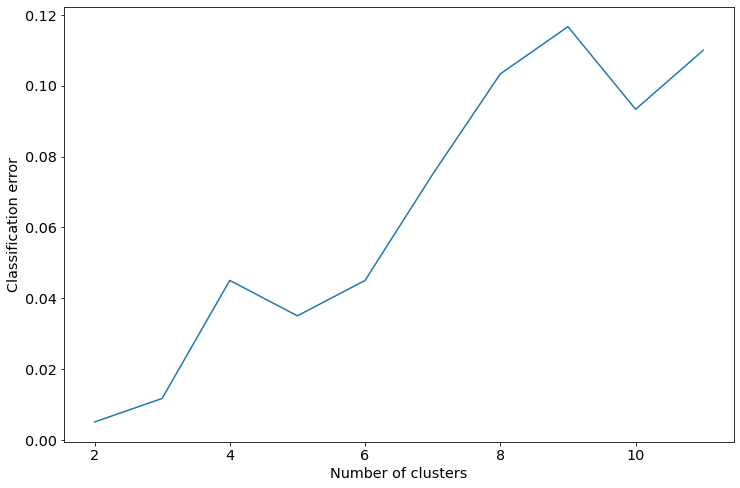

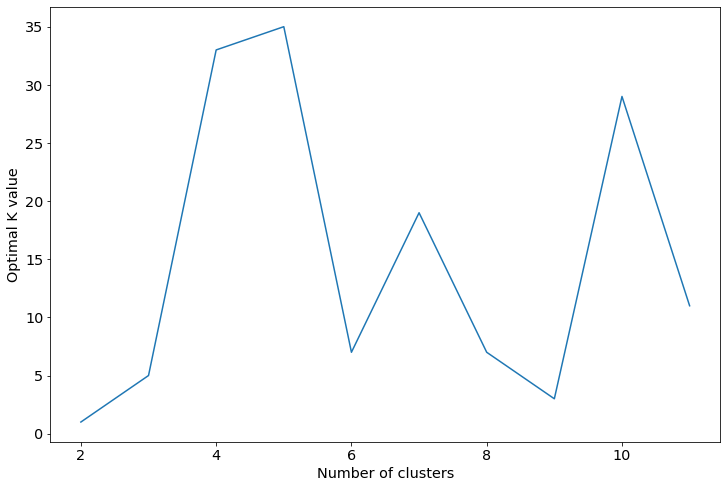

In [124]:
plt.xlabel("Number of clusters")
plt.ylabel("Classification error")
plt.plot(np.arange(2,12,1),errors)
plt.show()

plt.xlabel("Number of clusters")
plt.ylabel("Optimal K value")
plt.plot(np.arange(2,12,1),optimal_ks)
plt.show()

# Part 2: Application

In this portion of the lab, you will work with audio recordings of two music genres: *Kiki* and *Bouba*. These genres are popular amongst the beings that inhabit the digital world. Download the zipfile from the Canvas lab 02 page, unzip, and put them somewhere you can find them. 

Below are two functions we will use to extract features from the audio data.

In [19]:
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
from pydub import AudioSegment,playback
from mlxtend.plotting import plot_decision_regions

/Users/simonfal/opt/anaconda3/envs/mulab1/lib/python3.8/site-packages/pydub/utils.py:179: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


In [20]:
def extractZC( data, windowsizeinsamples, windowhopinsamples ):
  totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
  numbersignchanges = []
  for ii in np.arange(totalnumberofwindows):
    windowstart = np.int(ii*windowhopinsamples)
    windowend = np.int(windowstart + windowhopinsamples)
    datasign = np.sign(data[windowstart:windowend])
    datasignderivative = datasign - np.roll(datasign,1)
    numbersignchanges.append(np.count_nonzero(datasignderivative[1:-1]))
  return np.array(numbersignchanges)

def extractSC( data, windowsizeinsamples, windowhopinsamples, samplerate ):
  totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
  centroid = []
  freqs = np.arange(np.ceil(windowsizeinsamples/2.0)+1)*samplerate/windowsizeinsamples
  for ii in np.arange(totalnumberofwindows):
    windowstart = np.int(ii*windowhopinsamples)
    windowend = np.int(windowstart + windowsizeinsamples)
    DATA = np.abs(np.fft.fft(data[windowstart:windowend]))
    centroid.append(np.sum(freqs*DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)])/
                    np.sum(DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)]))
  return np.array(centroid)

In [21]:
# Functions from Lab 1

class MyAudioSegment(AudioSegment):
    def monosamples(self):
        '''returns left channel samples'''
        return self.get_array_of_samples()[::2]

    def get_timeline(self,offset=0):
        N = int(self.frame_rate * self.duration_seconds)
        return np.linspace(offset,offset+self.duration_seconds,N)

    def plot_channel(self,offset=0,channel=0):
        '''Time amplitude plot for channel left=0 , right=1'''
        plt.xlabel('Time [seconds]')
        plt.ylabel('Amplitude')
        plt.plot(
                self.get_timeline(offset),
                self.monosamples()
        )

    def compute_fft(self, window=None):
        if window == 'boxcar':
            window = signal.windows.boxcar(len(self.monosamples()))
        elif window == 'hann':
            window = signal.windows.hann(len(self.monosamples()))
        window_samples = [w * x for (w,x) in zip(window,self.monosamples())]
        return np.fft.rfft(window_samples)

    def compute_stft(self, window, w_length, hop_size, nfft):
        return signal.stft(
                            self.monosamples(),
                            fs=self.frame_rate,
                            window=window,
                            nperseg=self.frame_rate*w_length,
                            noverlap=self.frame_rate*hop_size,
                            nfft=nfft
        )
    
    def compute_mel(self, w_length, hop_size, nfft):
        return librosa.feature.melspectrogram(
                                                y=np.array(self.monosamples()).astype(np.float),
                                                sr=self.frame_rate,
                                                n_fft=nfft, 
                                                hop_length=math.floor(self.frame_rate*hop_size), 
                                                win_length=math.floor(self.frame_rate*w_length),
                                                n_mels=128
        )
    
    def compute_mfcc(self, n_mfcc, win_length, hop_length, nfft):
        return librosa.feature.mfcc(
                                    y=np.array(self.monosamples()).astype(np.float),
                                    sr=self.frame_rate,
                                    n_mfcc=20,
                                    win_length=math.floor(self.frame_rate*win_length),
                                    hop_length=math.floor(self.frame_rate*hop_length),
                                    n_fft=nfft
        )

    def count_crossings(self):
        count = 0
        samples = self.monosamples()
        for i in range(0, len(self)):
            if samples[i]*samples[i+1] < 0:
                count += 1
        return count

    def spectral_centroid(self):
        assert len(self.monosamples()) % 2 == 0
        fs = self.frame_rate
        N = len(self.monosamples())
        fourier = np.abs(np.fft.rfft(self.monosamples()))
        den = sum([fs*k*fourier[k]/N for k in range(N//2+1)])
        num = sum([fourier[k] for k in range(N//2+1)])
        return den/num
    
def fragmentize(seg,frame_size,hop_size):
    ''' take a segment and return an array of frames given frame+hop size'''
    frame_size = int(seg.frame_rate * frame_size/2)*2 # make number of samples even
    hop_size = int(seg.frame_rate * hop_size/2)

    frame_arr = []
    k = 0
    while k + frame_size < seg.frame_count():
        slize = seg.get_sample_slice(k,k+frame_size)
        frame_arr.append(slize)
        k += hop_size
    return frame_arr

# 2.1 

Using the functions above, compute zero crossing and spectral centroid features for all kiki and bouba training data files using contiguous 100 ms frames. 

In [22]:
bouba_zeros = []
bouba_centroids = []
kiki_zeros = []
kiki_centroids = []

# Collect from training files
for idx in range(1,101):
    file_name = 'bouba_{:04}.m4a'.format(idx)
    segment = MyAudioSegment.from_file('KikiBoubadata/kikibouba_train/bouba/'+file_name)  
    fs = segment.frame_rate
    bouba_zeros.extend(extractZC(segment.monosamples(), 0.1*fs, 0.1*fs))
    bouba_centroids.extend(extractSC(segment.monosamples(), 0.1*fs, 0.1*fs, fs))


    file_name = 'kiki_{:04}.m4a'.format(idx)
    segment = MyAudioSegment.from_file('KikiBoubadata/kikibouba_train/kiki/'+file_name)
    fs = segment.frame_rate
    kiki_zeros.extend(extractZC(segment.monosamples(), 0.1*fs, 0.1*fs))
    kiki_centroids.extend(extractSC(segment.monosamples(), 0.1*fs, 0.1*fs, fs))

    print(idx)
    

assert len(bouba_centroids) == len(bouba_zeros)
assert len(kiki_centroids) == len(kiki_zeros)

# Use the numbering 0: Bouba, 1: Kiki.
N_0 = len(bouba_centroids)
N_1 = len(kiki_centroids)

# Total number of observations
N = N_0 + N_1

# Formalize notation
X = np.array([bouba_zeros + kiki_zeros, bouba_centroids + kiki_centroids])
y = np.concatenate([np.zeros(N_0), np.ones(N_1)])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


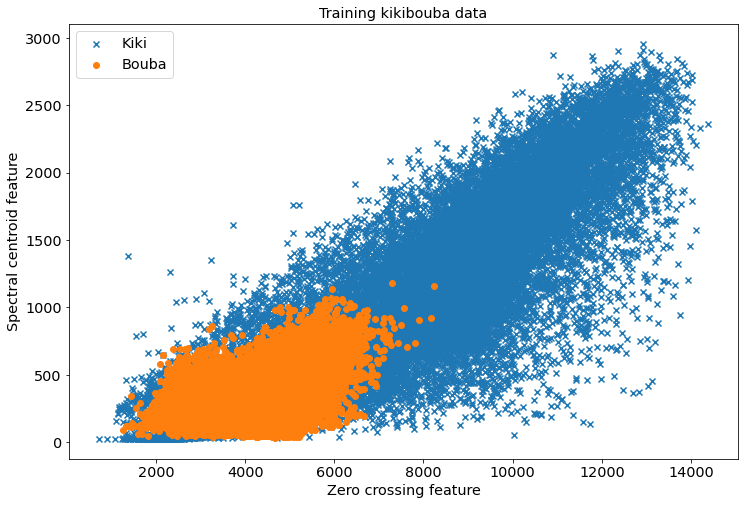

In [23]:
plt.title("Training kikibouba data")
plt.xlabel("Zero crossing feature")
plt.ylabel("Spectral centroid feature")
plt.scatter(X[1,N_0:],X[0,N_0:], marker="x")
plt.scatter(X[1,:N_0],X[0,:N_0], marker="o")
plt.legend(["Kiki", "Bouba"])
plt.show()

# 2.2 

Create and plot histograms of the zero crossings feature and the spectral centroid feature for the class kiki. Use 50 bins. Do the same for bouba. Normalize each histogram by dividing its counts by the sum of all counts.

The function I use for this is [pandas.DataFrame.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html). That means creating a pandas dataframe from the extracted features. Another possibility is using [matplotlib.pyplot.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html).

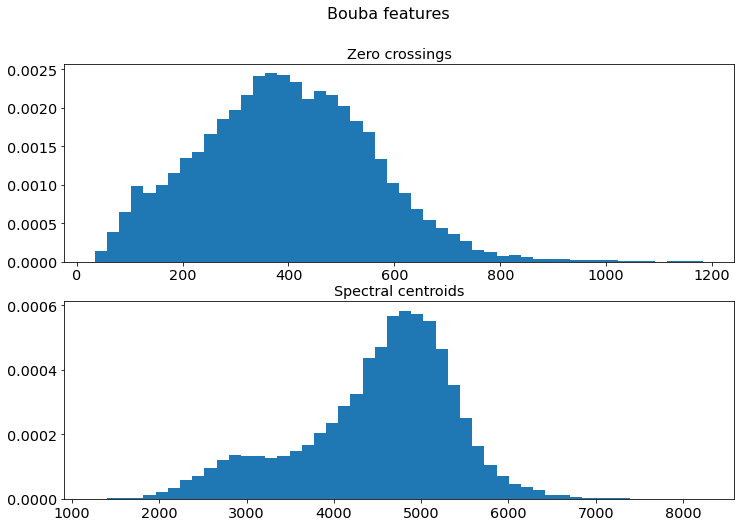

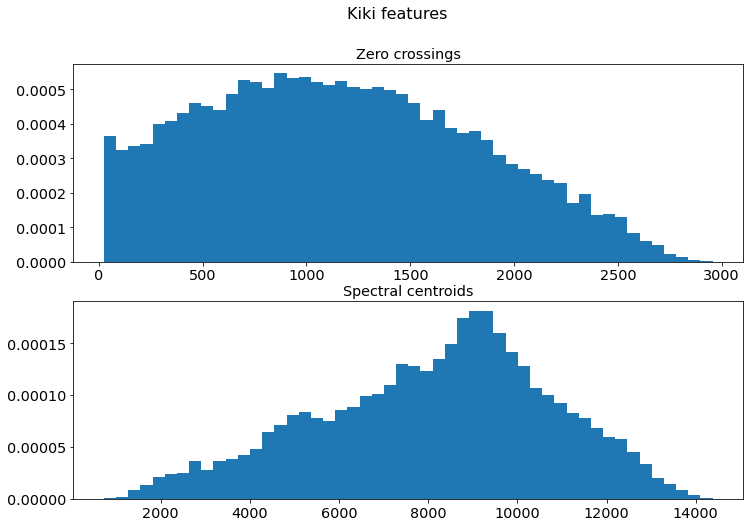

In [24]:
fig = plt.figure()
fig.suptitle("Bouba features", fontsize=16)
ax = plt.subplot(2,1,1)
ax.set_title("Zero crossings")
ax.hist(X[0,:N_0], bins=50, density=True)

ax = plt.subplot(2,1,2)
ax.set_title("Spectral centroids")
ax.hist(X[1,:N_0], bins=50, density=True)
plt.show()

fig = plt.figure()
fig.suptitle("Kiki features", fontsize=16)
ax = plt.subplot(2,1,1)
ax.set_title("Zero crossings")
ax.hist(X[0,N_0:], bins=50, density=True)

ax = plt.subplot(2,1,2)
ax.set_title("Spectral centroids")
ax.hist(X[1,N_0:], bins=50, density=True)
plt.show()

# 2.3 

Let's model *each* feature of the *each* class by a Gausssian distribution.
This means we want to approximate each histogram of each feature observed in class $g$ by a Gaussian function with mean $\mu_{*,g}$ and variance $\sigma_{*,g}^2$:
$$f_{X|G}(x|g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x-\mu_{*,g})^2/2\sigma_{*,g}^2\right ]$$

Use unbiased maximum likelihood estimation (MLE) to compute the parameters of the two distributions using your training observations. Remember, the MLE mean of $N$ numbers $\{x_1, x_2, \ldots, x_N\}$ is given by $$\hat\mu = \frac{1}{N}\sum_{n=1}^N x_n$$ and the MLE variance is given by $$\sigma^2 = \frac{1}{N-1}\sum_{n=1}^N (x_n-\hat\mu)^2.$$

Plot these four distributions, overlayed on the normalized histograms of the features for the two classes.


Text(0.5, 1.0, 'Kiki spectral centroids')

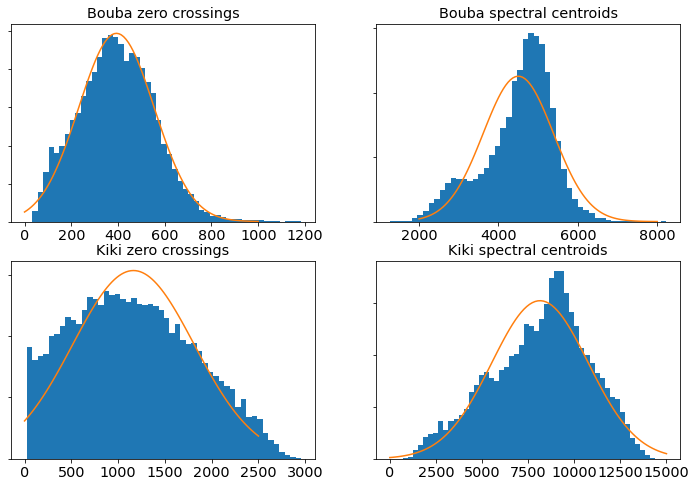

In [25]:
from scipy import stats

def normal_xy(data, lower_limit, upper_limit, axis_points=100):
    mean = np.mean(data)
    #Unbiased estimator of std dev
    std = np.std(data, ddof=1)
    
    x_axis = np.linspace(lower_limit, upper_limit, axis_points)
    y_axis = stats.norm.pdf(x_axis, mean, std)
    return x_axis, y_axis

fig, axs =  plt.subplots(2,2)

axs[0,0].hist(X[0,:N_0], bins=50, density=True)
n00 = normal_xy(X[0,:N_0], 0, 1000)
axs[0,0].plot(n00[0],n00[1])
axs[0,0].set_yticklabels([])
axs[0,0].set_title("Bouba zero crossings")

axs[0,1].hist(X[1,:N_0], bins=50, density=True)
n01 = normal_xy(X[1,:N_0], 2000, 8000)
axs[0,1].plot(n01[0],n01[1])
axs[0,1].set_yticklabels([])
axs[0,1].set_title("Bouba spectral centroids")

axs[1,0].hist(X[0,N_0:], bins=50, density=True)
n10 = normal_xy(X[0,N_0:], 0, 2500)
axs[1,0].plot(n10[0],n10[1])
axs[1,0].set_yticklabels([])
axs[1,0].set_title("Kiki zero crossings")

axs[1,1].hist(X[1,N_0:], bins=50, density=True)
n11 = normal_xy(X[1,N_0:], 0, 15000)
axs[1,1].plot(n11[0],n11[1])
axs[1,1].set_yticklabels([])
axs[1,1].set_title("Kiki spectral centroids")


# 2.5

Now write a function using all the parameters you have estimated that computes the posterior odds of Kiki given a two-dimensional observation, and returns 1 (Kiki) if the odds are greater than 2, and otherwise 0 (Bouba). Use the MLE parameters you found in the previous part.

In [26]:
priors = [N_0/N, N_1/N]

def lablifier(testvector, X, y):
    '''Bouba is 0, Kiki is 1'''
    
    # Likelihood
    def L(class_index, feature_index):
        # X indexed on classes
        X_data = {0: X[:,:N_0],
                 1: X[:,N_0:]
        }
        
        return stats.norm.pdf(testvector[feature_index],
                            np.mean(X_data[class_index][feature_index]),
                            np.std(X_data[class_index][feature_index], ddof=1)
        )
    
    # Multiply with class 1, divide by class 0 likelihood
    likelihood = L(1,0) * L(1,1) /(L(0,0) * L(0,1))
    
    if likelihood * priors[1] / priors[0] > 2:
        return 1
    else:
        return 0


# 2.6 

Use your function to label all observations in the training data and create one scatter plot of the labeled Kiki observations, and one scatter plot of the labeled Bouba observations, both color-coded by the predicted labels. (This should take some time to compute because the classifier you have created is not very optimized.)

> Observations classified as Bouba are purple, and observations classified as Kiki are yellow below.

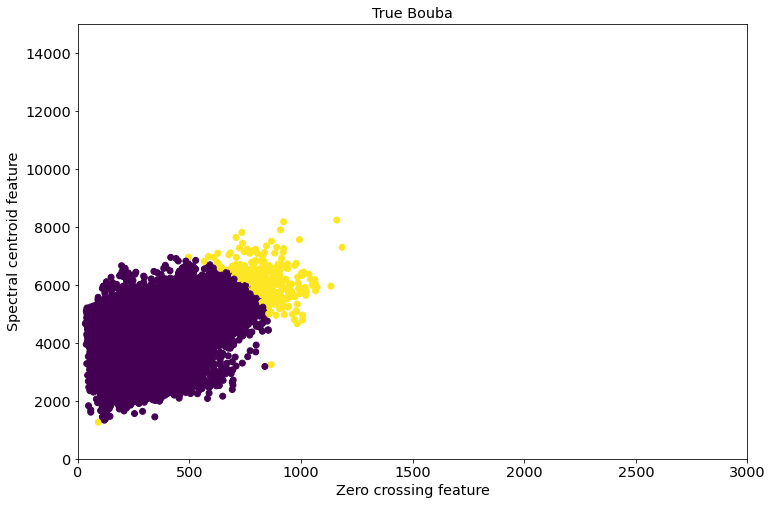

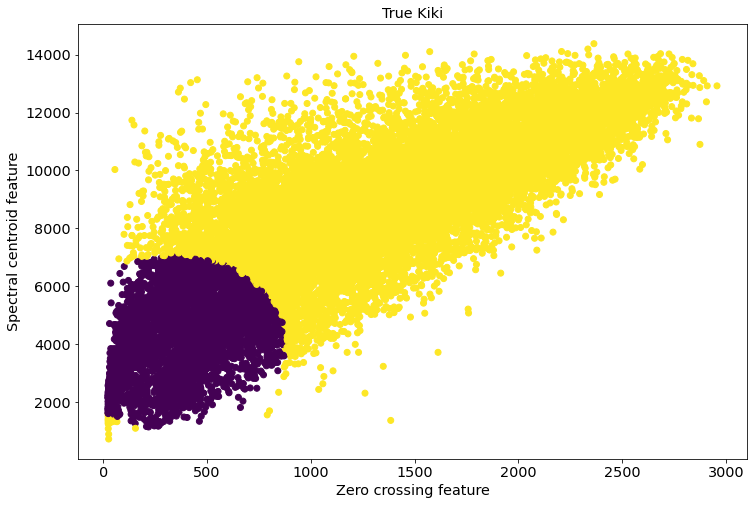

In [27]:
y_labeled = np.zeros(N)

for i, obs in enumerate(X.T):
    y_labeled[i] = lablifier(obs, X, y)

plt.xlim([0,3000])
plt.ylim([0,15000])
plt.title("True Bouba")
plt.xlabel("Zero crossing feature")
plt.ylabel("Spectral centroid feature")
plt.scatter(X[0,:N_0],X[1,:N_0], c=y_labeled[:N_0])
plt.show()

plt.title("True Kiki")
plt.xlabel("Zero crossing feature")
plt.ylabel("Spectral centroid feature")
plt.scatter(X[0,N_0:],X[1,N_0:], c=y_labeled[N_0:])
plt.show()

# 2.7

Explain what you see, and how it compares to the scatter plot you created in #2.1.
> We see in 2.1 that in the left lower region there are points belonging to both Kiki and Bouba. Therefore the decision boundary drawn will unavoidably classify true Kiki points as Bouba. We can see this in the latter plot of 2.6. Also, some of the true Bouba points were classified as Kiki. That is because the Bouba decision region was made too wide, which can have been caused by many steps in this simplified method. There will for instance always be some errors due to the parameter estimation in 2.3.

# 2.8 
Compute a confusion table summarizing the results of your classifier on the training dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes.

**Precision:** of those classified as g, how large was the percentage actually belonging to class g? <br>
**Recall:** of those actually being of class g, how large percentage did we classify as g?

In [29]:
print(confusion_matrix(y, y_labeled))
print()
print(classification_report(y, y_labeled))


[[26276   344]
 [ 5328 17601]]

              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90     26620
         1.0       0.98      0.77      0.86     22929

    accuracy                           0.89     49549
   macro avg       0.91      0.88      0.88     49549
weighted avg       0.90      0.89      0.88     49549



# 2.9 

Use your function to label all observations in the testing dataset. Compute a confusion table summarizing the results of your classifier on the testing dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes. Compare with the results on the training dataset.
> We see that classification of test data suffer from the same problem as we saw for the training data. Precision and recall statistics are very similar. In the case that the training data would deviate much from the general data, we would expect the performance to decrease. However we see on the plots that the characteristics of the data are very much the same.

In [30]:
# Collect from test files
for idx in range(1,11):
    idx = idx + 100
    file_name = 'bouba_{:04}.m4a'.format(idx)
    segment = MyAudioSegment.from_file('KikiBoubadata/kikibouba_test/bouba/'+file_name)
    
    fs = segment.frame_rate
    bouba_zeros.extend(extractZC(segment.monosamples(), 0.1*fs, 0.1*fs))
    bouba_centroids.extend(extractSC(segment.monosamples(), 0.1*fs, 0.1*fs, fs))

    file_name = 'kiki_{:04}.m4a'.format(idx)
    segment = MyAudioSegment.from_file('KikiBoubadata/kikibouba_test/kiki/'+file_name)
    fs = segment.frame_rate
    kiki_zeros.extend(extractZC(segment.monosamples(), 0.1*fs, 0.1*fs))
    kiki_centroids.extend(extractSC(segment.monosamples(), 0.1*fs, 0.1*fs, fs))
    

assert len(bouba_centroids) == len(bouba_zeros)
assert len(kiki_centroids) == len(kiki_zeros)

# Use the numbering 0: Bouba, 1: Kiki.
Nt_0 = len(bouba_centroids)
Nt_1 = len(kiki_centroids)

# Total number of observations
Nt = Nt_0 + Nt_1

# Formalize notation
Xt = np.array([bouba_zeros + kiki_zeros, bouba_centroids + kiki_centroids])
yt = np.concatenate([np.zeros(Nt_0), np.ones(Nt_1)])

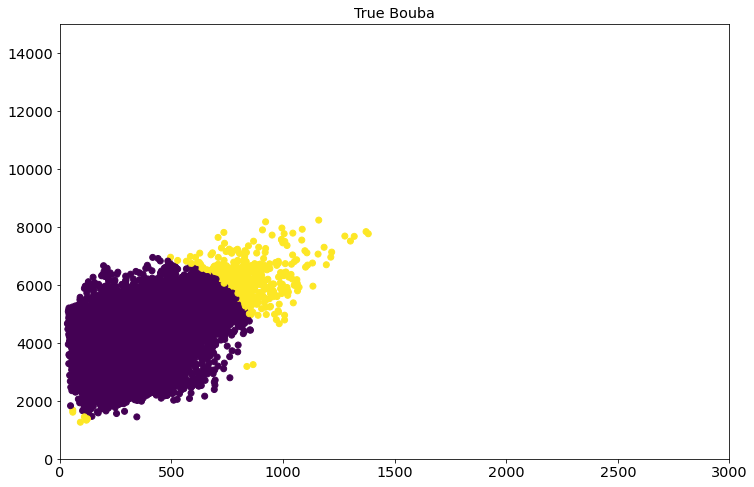

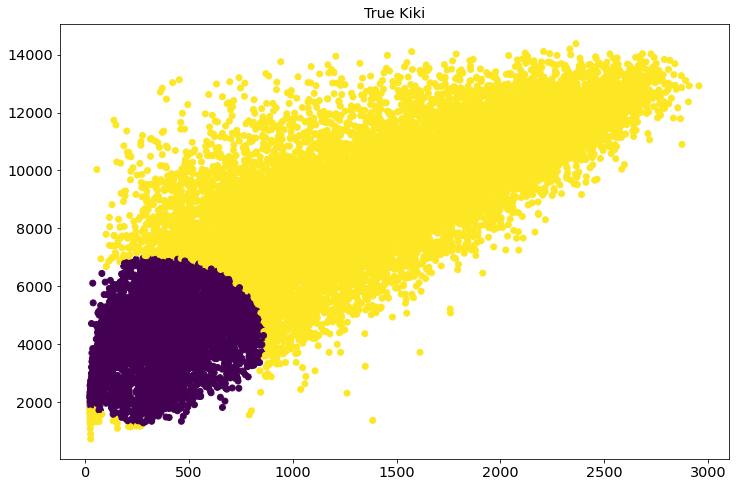

In [31]:
yt_labeled = np.zeros(Nt)

for i, obs in enumerate(Xt.T):
    yt_labeled[i] = lablifier(obs, Xt, yt)

plt.xlim([0,3000])
plt.ylim([0,15000])
plt.title("True Bouba")
plt.scatter(Xt[0,:Nt_0],Xt[1,:Nt_0], c=yt_labeled[:Nt_0])
plt.show()

plt.title("True Kiki")
plt.scatter(Xt[0,Nt_0:],Xt[1,Nt_0:], c=yt_labeled[Nt_0:])
plt.show()

In [32]:
print(confusion_matrix(yt, yt_labeled))
print()
print(classification_report(yt, yt_labeled))

[[28733   478]
 [ 5693 19486]]

              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90     29211
         1.0       0.98      0.77      0.86     25179

    accuracy                           0.89     54390
   macro avg       0.91      0.88      0.88     54390
weighted avg       0.90      0.89      0.88     54390



# 2.10

Discuss several ways you might build a better Kiki-Bouba classifier.

> We have only taken into account two features, and it is clear that this is noth enough to separate the data apart. So a first step would be to include more features, although we don't want to use too many in order to keep the model simple and computationally efficient.